In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import lmfit

In [2]:
def read_spe(date, infile):

    os.chdir(date) 
    
    hist_cts = []
    
    with open(infile) as f:
        for lineno, line in enumerate(f):
            if  12 <= lineno < 2060:
                hist_cts.append(float(line.strip()))
    hist_cts = np.array(hist_cts)
    
    os.chdir('..')

    return hist_cts 

In [4]:
os.chdir('cosmic_muon')

<ErrorbarContainer object of 3 artists>

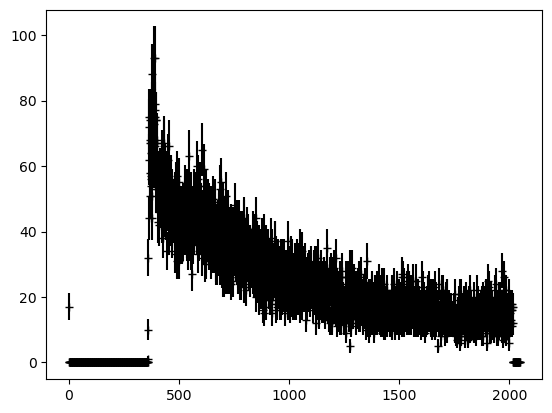

In [7]:
hist = read_spe('2025-10-06', '1006-lifetime.Spe')
x = np.arange(hist.shape[0])
plt.errorbar(x, hist, yerr = np.sqrt(hist), fmt = 'k+')

In [6]:
def expoential_model(t, tau, a, b):
    return a*np.exp(-t/tau)+b 
    

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 40
    # data points      = 1200
    # variables        = 3
    chi-square         = 1256.62032
    reduced chi-square = 1.04980812
    Akaike info crit   = 61.3251307
    Bayesian info crit = 76.5953612
    R-squared          = 0.54258314
[[Variables]]
    tau:  427.779683 +/- 36.2782829 (8.48%) (init = 500)
    a:    125.893073 +/- 20.2102511 (16.05%) (init = 30)
    b:    11.4850731 +/- 0.49311920 (4.29%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(tau, a) = -0.9851
    C(tau, b) = -0.9215
    C(a, b)   = +0.8560


<Figure size 640x480 with 0 Axes>

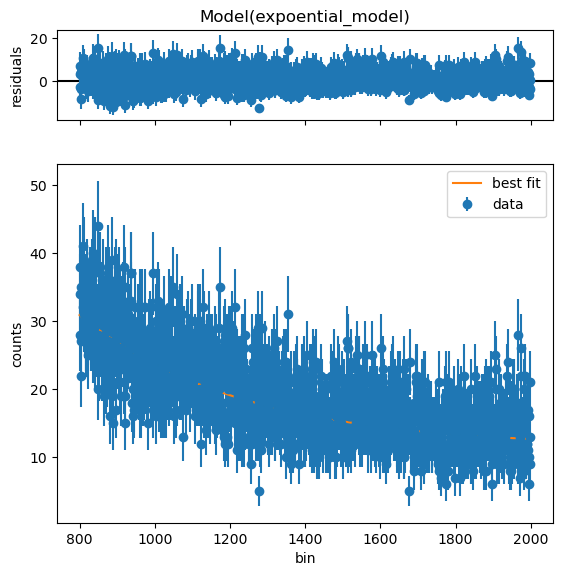

In [9]:

model = lmfit.Model(expoential_model)

x = x[400:2000]
hist = hist[400:2000]


result = model.fit(hist, t=x, tau=500, a=30, b= 10, weights=1/np.sqrt(hist))

lmfit.report_fit(result)
plt.figure()
result.plot()
plt.xlabel(r"bin")
plt.ylabel("counts")
plt.show()